In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
qid  = 'green'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
body = '''
    PREFIX colors: <http://www.streamreasoning.org/ontologies/2018/9/colors#>
    CONSTRUCT { 
           ?y a colors:Green; 
               colors:from ?r , ?g .
    }
    FROM NAMED WINDOW <cw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT1S STEP PT1S]
    WHERE {
        { WINDOW <cw> { ?r a colors:Red. } }
            UNION
        { WINDOW <cw> { ?g a colors:Yellow .} }

        BIND( UUID() as ?y )
    }
    '''

In [4]:
yellowq = jasper.create(qid, body, tbox)

In [5]:
yellowq

http://jasper:8181/jasper/queries/green

In [6]:
jasper.streams()

[http://jasper:8181/jasper/streams/bluecount,
 http://streamhub:9292/streamhub/streams/colorstream,
 http://redstream:1255/red,
 http://jasper:8181/jasper/streams/green]

In [7]:
yellow_stream = yellowq.stream()

In [8]:
#the stream has not endpoint

In [9]:
yellow_stream.endpoints()

[]

In [10]:
# we need to expose it

In [11]:
r = jasper.expose(qid, 'WEBSOCKET', retention = 5)

In [12]:
yellowq.stream().endpoints()

[GET ws://jasper:8184/jasper/streams/green/observers/31458246]

In [13]:
endpoint = r.endpoints()[0]
endpoint

GET ws://jasper:8184/jasper/streams/green/observers/31458246

In [14]:
resp = endpoint.call()

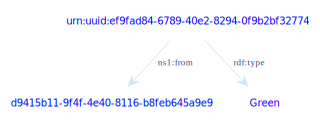

In [15]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png

data, metadata = draw_graph(resp.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [16]:
resp

{
    "@graph": [
        {
            "@id": "http://streamreasoning.org/result/1589229271566",
            "eventTime": "1589229271566",
            "processingTime": "1589229271569"
        },
        {
            "@id": "urn:uuid:ef9fad84-6789-40e2-8294-0f9b2bf32774",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/d9415b11-9f4f-4e40-8116-b8feb645a9e9"
        }
    ],
    "@context": {
        "processingTime": {
            "@id": "http://streamreasoning.org/jasper/processingTime",
            "@type": "http://www.w3.org/2001/XMLSchema#dateTimeStamp"
        },
        "eventTime": {
            "@id": "http://streamreasoning.org/jasper/eventTime",
            "@type": "http://www.w3.org/2001/XMLSchema#dateTimeStamp"
        },
        "from": {
            "@id": "http://www.streamreasoning.org/ontologies/2018/9/colors#from",
            "@type": "@id"
        }
    }
}

In [17]:
jasper.delete(qid)

{
    "@id": "queries/green",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/green"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/colorstream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}